<a href="https://colab.research.google.com/github/sameekshya1999/NextWordPrediction/blob/main/nextword_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving cinderella.txt to cinderella.txt


### Step 3: Open and pre-process the data

In [ ]:
#Step 3: Open and pre-process the data
file = open("cinderella.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:100]

'Cinderella: A Tale of Hope and Kindness Once upon a time, in a faraway land, there was a kind and ge'

In [ ]:
len(data)

5703

### Step 4: Implement tokenization and make additional adjustments

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[6, 7, 131, 11, 132, 3, 67, 133, 134, 7, 68, 9, 7, 135, 136]

In [ ]:
len(sequence_data)

972

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

379


In [ ]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  969


array([[  6,   7, 131,  11],
       [  7, 131,  11, 132],
       [131,  11, 132,   3],
       [ 11, 132,   3,  67],
       [132,   3,  67, 133],
       [  3,  67, 133, 134],
       [ 67, 133, 134,   7],
       [133, 134,   7,  68],
       [134,   7,  68,   9],
       [  7,  68,   9,   7]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  6   7 131]
 [  7 131  11]
 [131  11 132]
 [ 11 132   3]
 [132   3  67]
 [  3  67 133]
 [ 67 133 134]
 [133 134   7]
 [134   7  68]
 [  7  68   9]]
Response:  [ 11 132   3  67 133 134   7  68   9   7]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Split your data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

### Step 5: Creating the model

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(Dropout(0.2))  #extra one
model.add(LSTM(1000))
model.add(Dropout(0.2))  #extra one
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#GRU model
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 10, input_length=3))
gru_model.add(GRU(1000, return_sequences=True))   # Add a GRU layer with 1000 units
gru_model.add(Dropout(0.2))
gru_model.add(GRU(1000))    # Add another GRU layer with 1000 units
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
gru_model.add(Dense(vocab_size, activation="softmax"))   # Add the output Dense layer with vocab_size units and softmax activation
gru_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Bidirectional LSTM

Bi_model = Sequential()  # Create a Sequential model
Bi_model.add(Embedding(vocab_size, 10, input_length=3))   # Add an Embedding layer
Bi_model.add(Bidirectional(LSTM(1000, return_sequences=True)))   # Add a Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Bidirectional(LSTM(1000)))     # Add another Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
Bi_model.add(Dense(vocab_size, activation="softmax"))    # Add the output Dense layer with vocab_size units and softmax activation
Bi_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 6: Plot the model

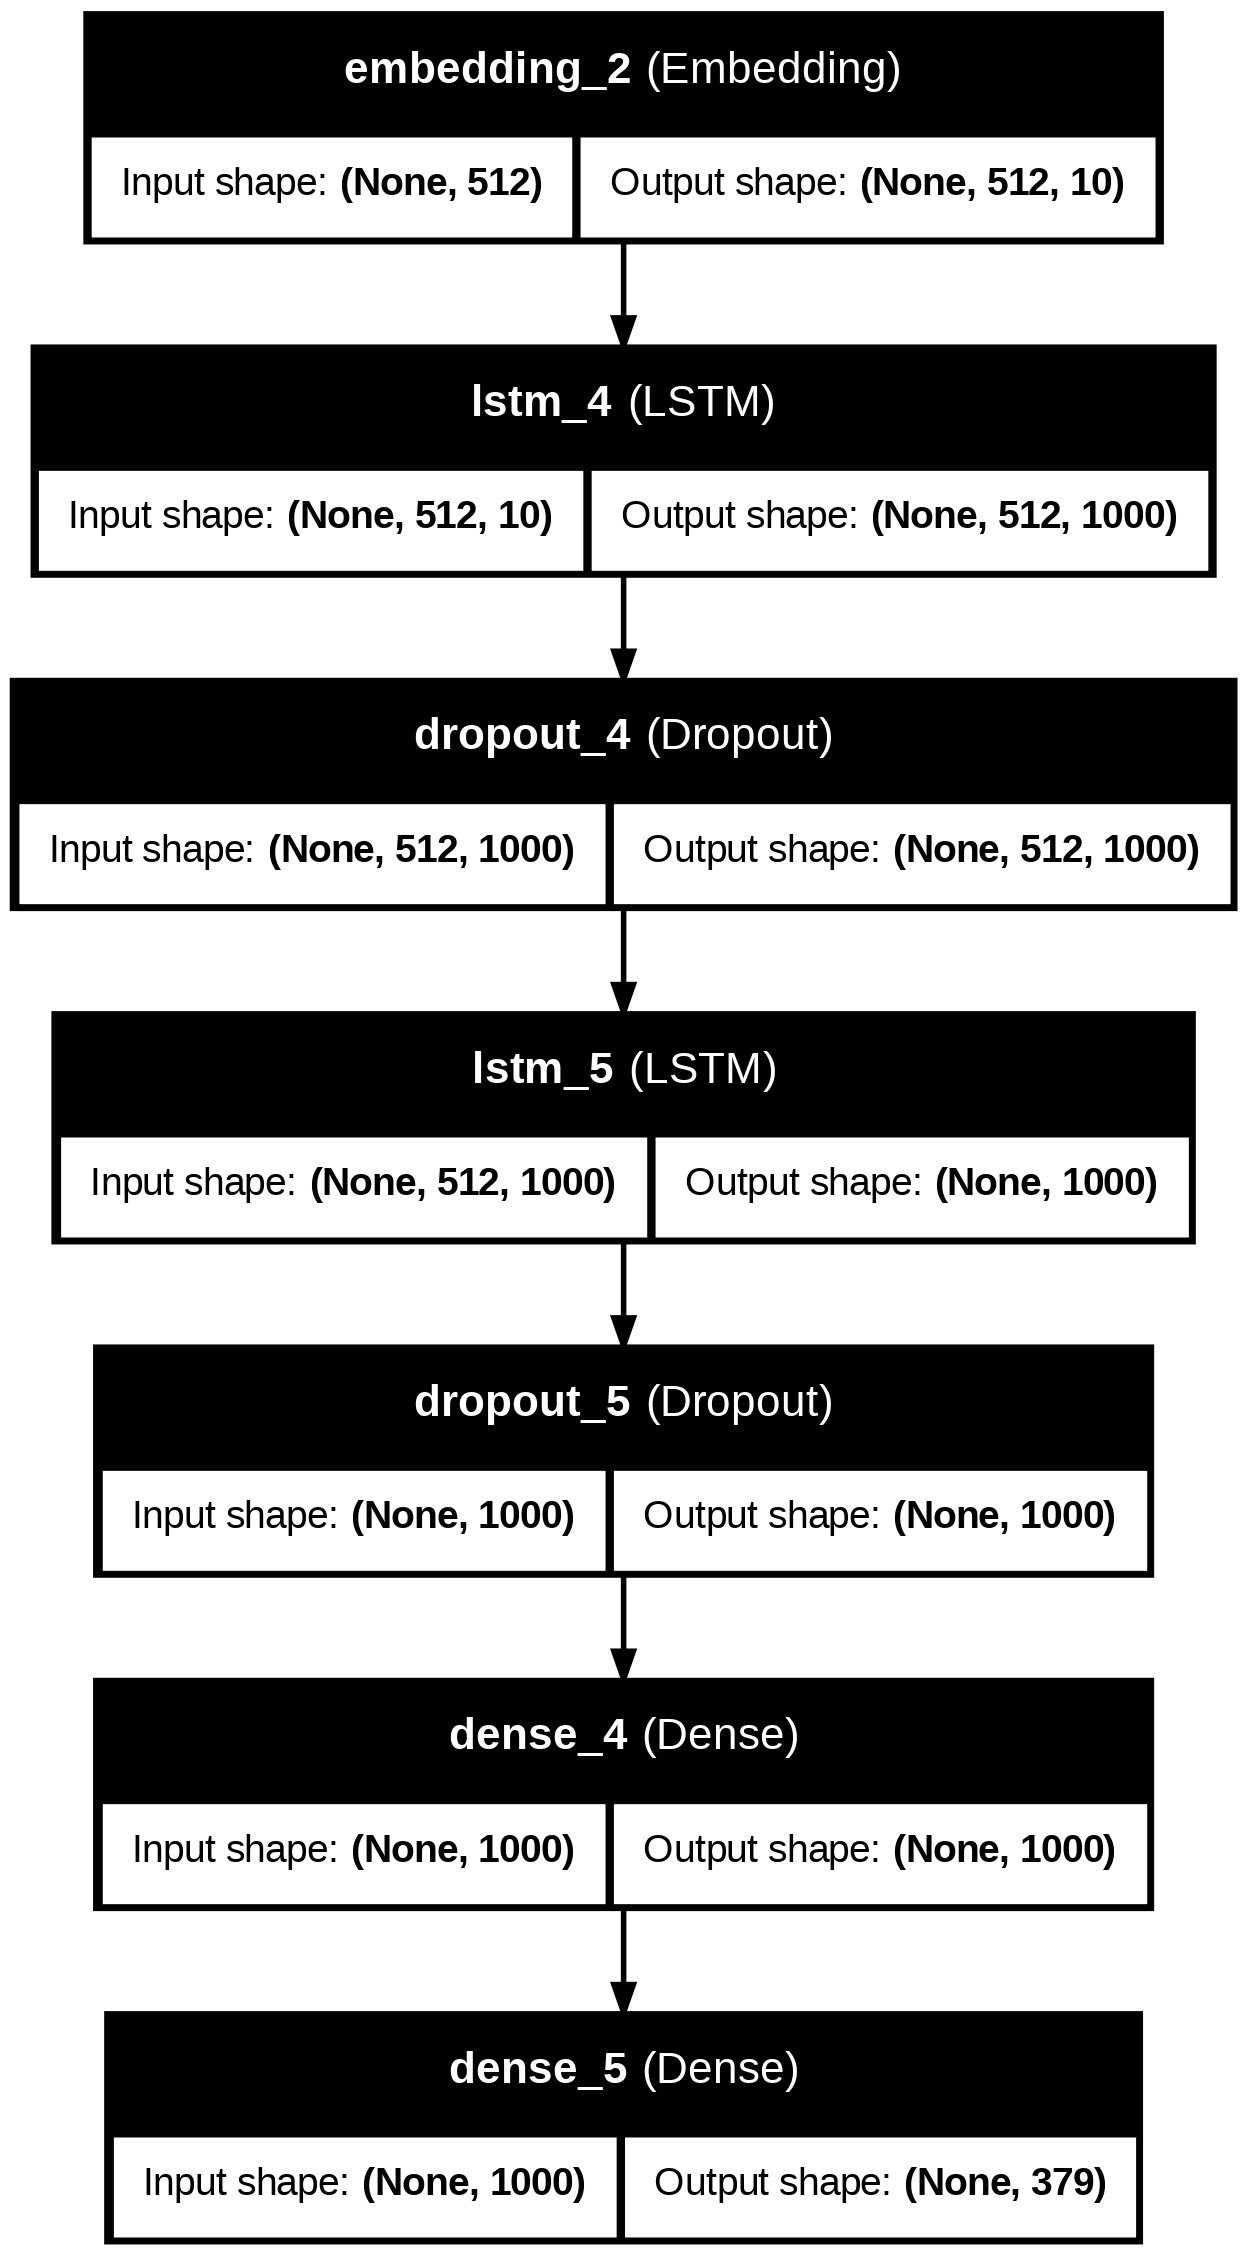

In [ ]:
# Assuming the input shape is (batch_size, 512)
model.build(input_shape=(None, 512))  # Replace 512 with your sequence length if different

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='plot.png', show_layer_names=True, show_shapes=True)


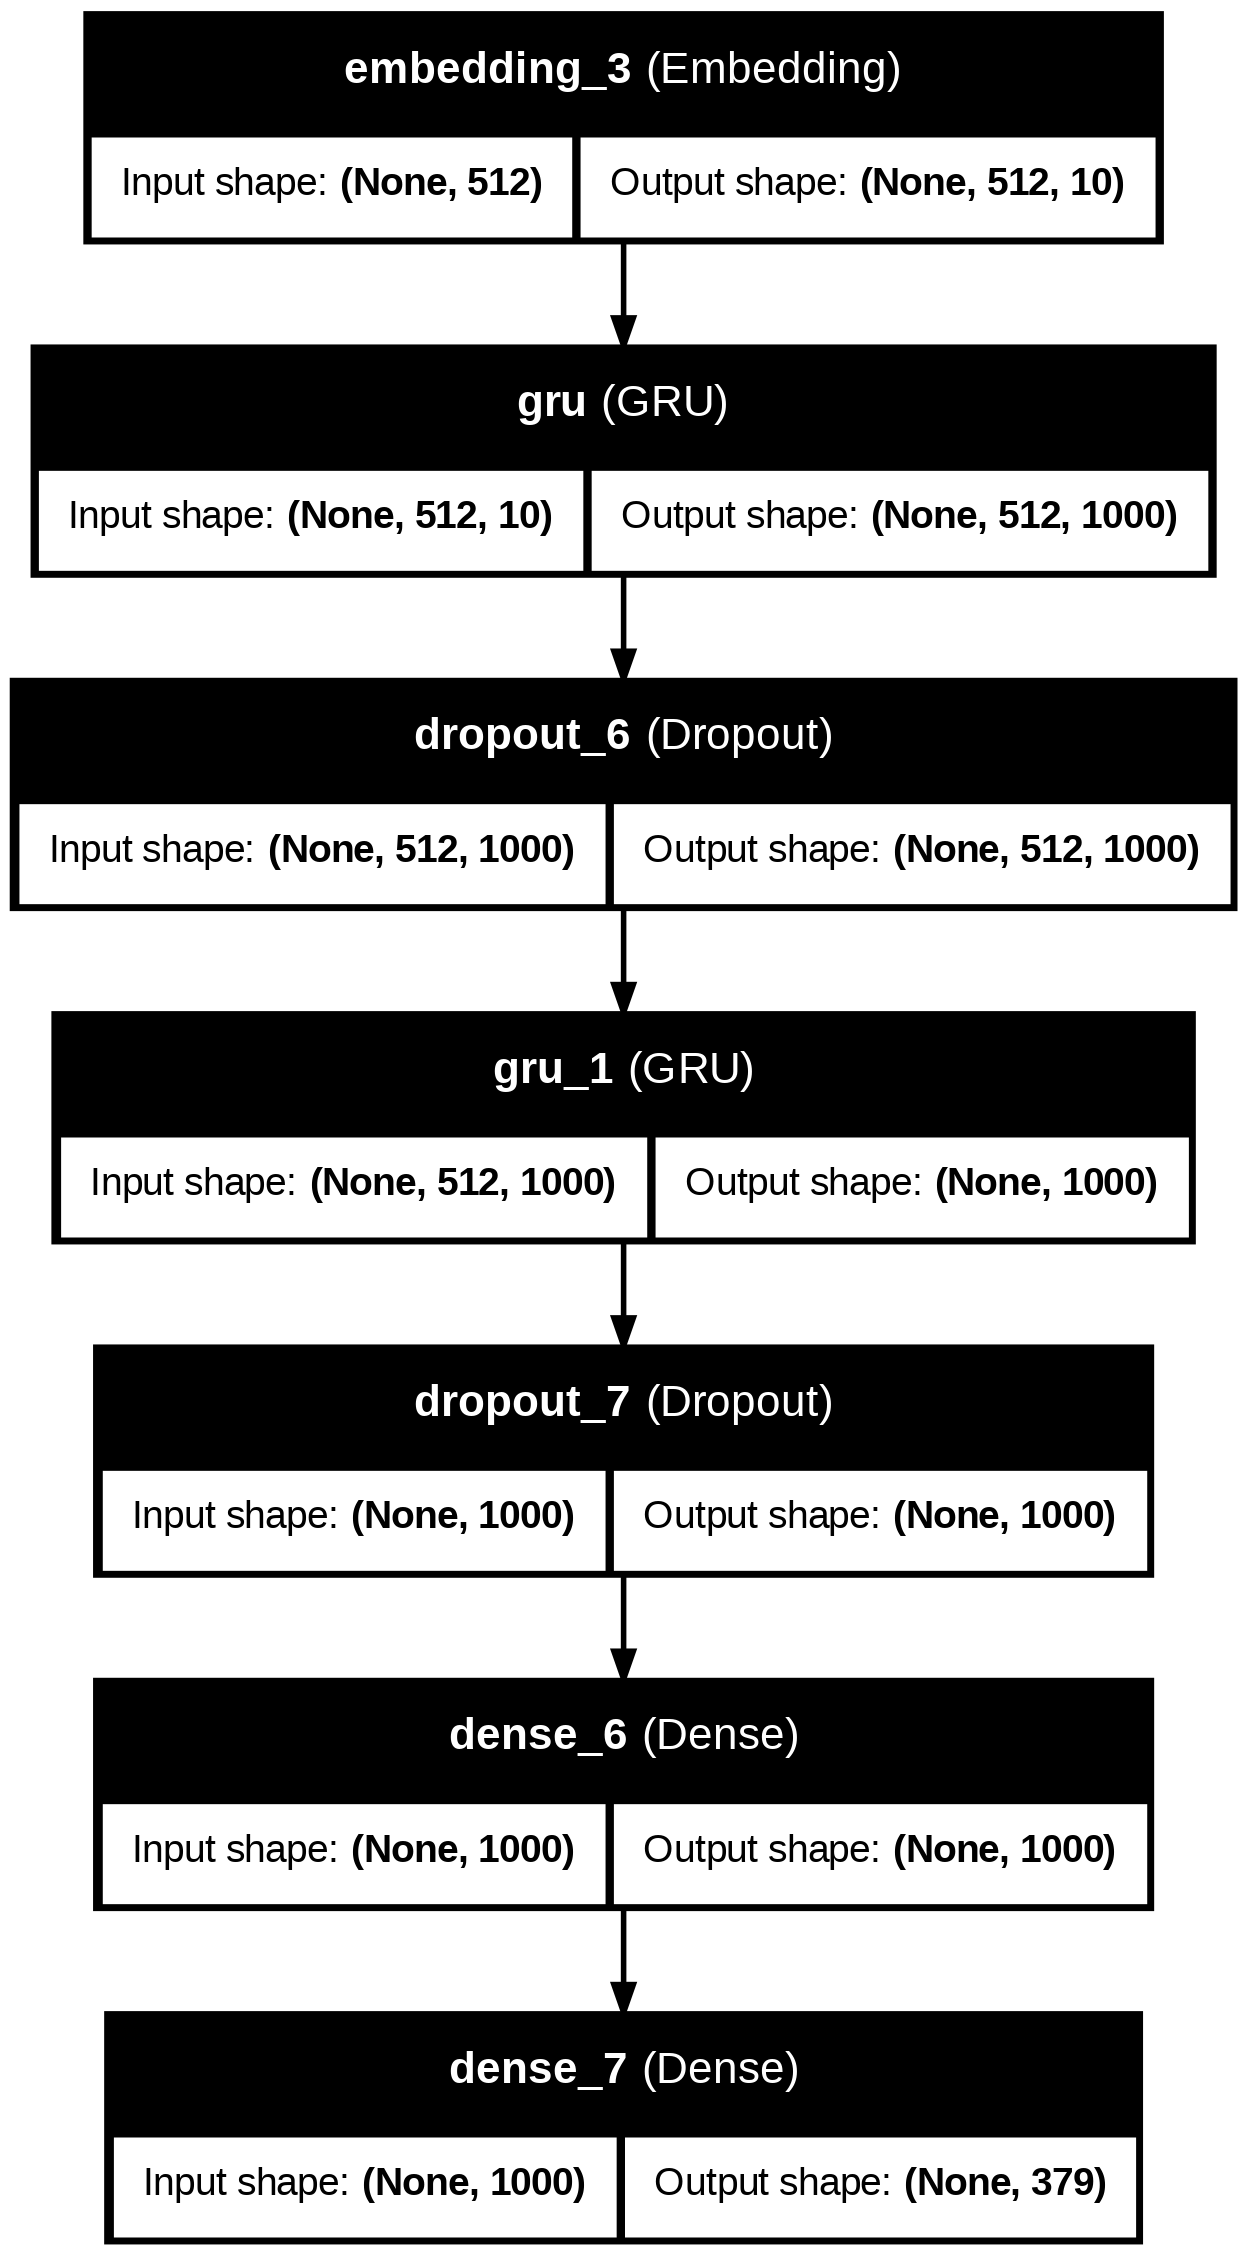

In [ ]:
# Assuming your GRU model has a sequence length of 512
gru_model.build(input_shape=(None, 512))  # Replace 512 with your actual sequence length

from tensorflow.keras.utils import plot_model
plot_model(gru_model, to_file='plot1.png', show_layer_names=True, show_shapes=True)


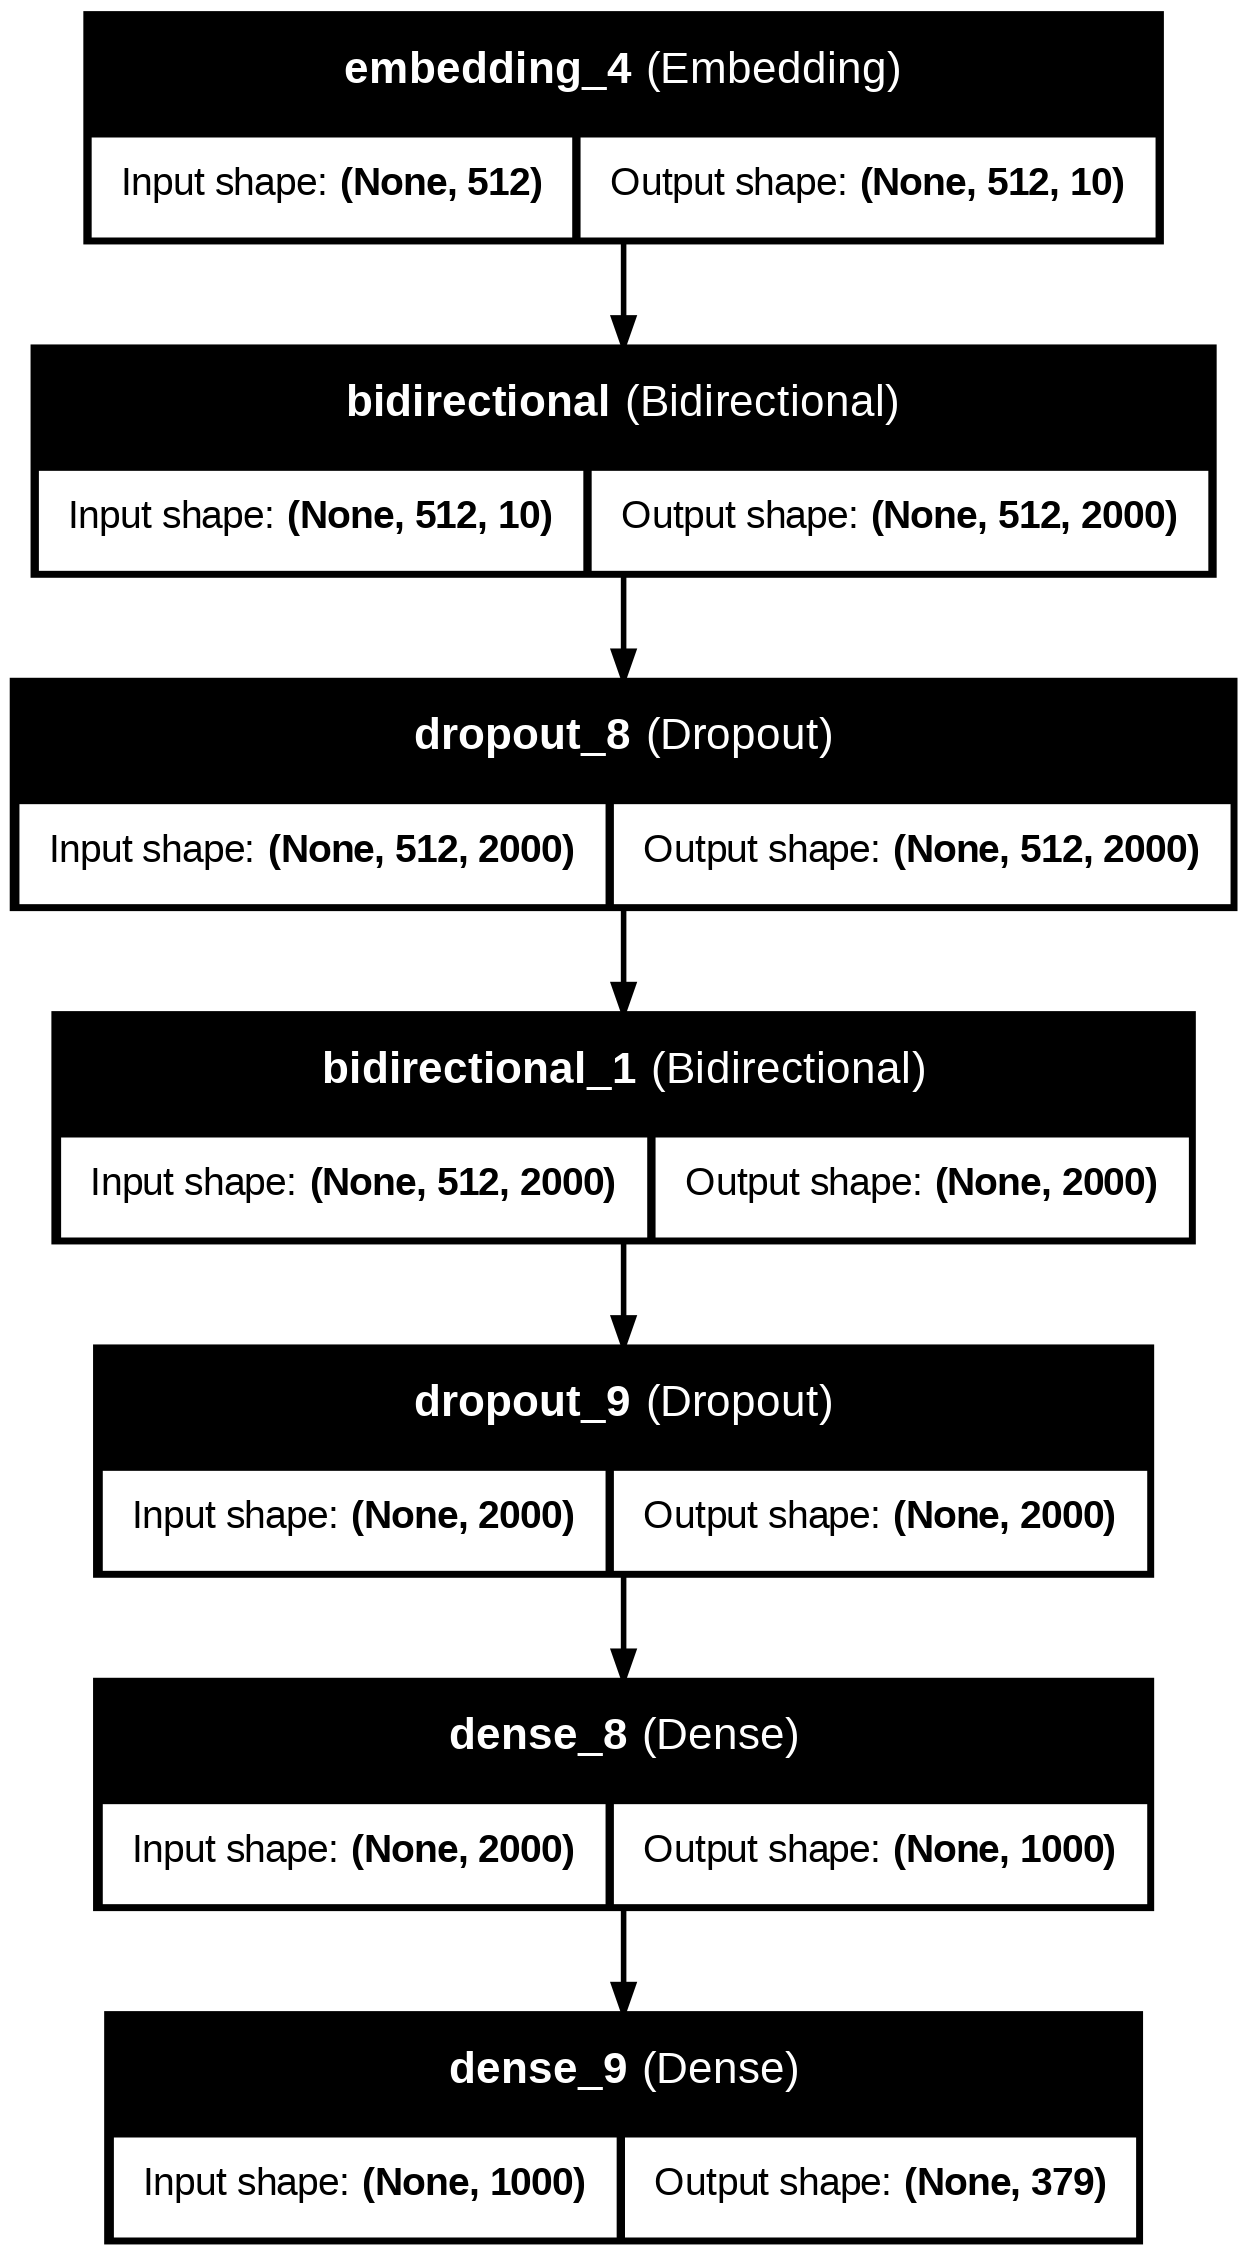

In [ ]:
# Assuming your Bi_model has a sequence length of 512
Bi_model.build(input_shape=(None, 512))  # Replace 512 with your actual sequence length

from tensorflow.keras.utils import plot_model
plot_model(Bi_model, to_file='plot2.png', show_layer_names=True, show_shapes=True)


### Step 7: Train the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint("next_words.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=50, callbacks=[checkpoint])


Epoch 1/30
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0523 - loss: 5.8852
Epoch 1: loss improved from inf to 5.74272, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.0544 - loss: 5.8615
Epoch 2/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0649 - loss: 5.2355
Epoch 2: loss improved from 5.74272 to 5.26422, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.0645 - loss: 5.2387
Epoch 3/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0667 - loss: 5.2026
Epoch 3: loss improved from 5.26422 to 5.17557, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.0667 - loss: 5.1996
Epoch 4/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0513 - loss: 5.0798
Epoch 4: loss improved from 5.17557 to 5.08947, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.0528 - loss: 5.0809
Epoch 5/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
#GRU model

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint("next_words_gru.keras", monitor='loss', verbose=1, save_best_only=True)
gru_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])   # Compile the GRU model
gru_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])     # Train the GRU model

Epoch 1/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0499 - loss: 5.8178
Epoch 1: loss improved from inf to 5.63113, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - accuracy: 0.0517 - loss: 5.7970
Epoch 2/40
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0625 - loss: 5.1321
Epoch 2: loss improved from 5.63113 to 5.26172, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0621 - loss: 5.1534
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0832 - loss: 5.1416
Epoch 3: loss improved from 5.26172 to 5.16737, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.0825 - loss: 5.1431
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0731 - loss: 5.0836
Epoch 4: loss improved from 5.16737 to 5.07894, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0729 - loss: 5.0833
Epoch 5/40
17/17 ━━━━━━━━━

In [ ]:
# Bidirectional LSTM
checkpoint = ModelCheckpoint("next_words_bi_lstm.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile the Bidirectional LSTM model
Bi_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the Bidirectional LSTM model (replace X_train and y_train with your data)
Bi_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0532 - loss: 5.8295
Epoch 1: loss improved from inf to 5.68647, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.0532 - loss: 5.8216
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0471 - loss: 5.1932
Epoch 2: loss improved from 5.68647 to 5.24895, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.0473 - loss: 5.1963
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0717 - loss: 5.1789
Epoch 3: loss improved from 5.24895 to 5.12781, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.0716 - loss: 5.1761
Epoch 4/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0643 - loss: 4.9272
Epoch 4: loss improved from 5.12781 to 4.96665, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - accuracy: 0.0648 - loss: 4.9316
Epoch 5/

In [ ]:
# Load the LSTM model from the checkpoint
model = load_model("next_words.keras")

# Evaluate the LSTM model on the test data
lstm_test_loss, lstm_test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy for the LSTM model
print("LSTM Test Accuracy:", lstm_test_accuracy)

# Load the GRU model from the checkpoint
gru_model = load_model("next_words_gru.keras")

# Evaluate the GRU model on the test data
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test)

# Print the test accuracy for the GRU model
print("GRU Test Accuracy:", gru_test_accuracy)

# Load the Bidirectional LSTM model from the checkpoint
bi_model = load_model("next_words_bi_lstm.keras")

# Evaluate the Bidirectional LSTM model on the test data
bi_test_loss, bi_test_accuracy = bi_model.evaluate(X_test, y_test)

# Print the test accuracy for the Bidirectional LSTM model
print("Bidirectional LSTM Test Accuracy:", bi_test_accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0138 - loss: 22.2754     
LSTM Test Accuracy: 0.02054794505238533
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0418 - loss: 32.3996  
GRU Test Accuracy: 0.034246575087308884
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0209 - loss: 38.9795
Bidirectional LSTM Test Accuracy: 0.027397260069847107


### Step 8: Let’s predict

In [ ]:
# Load the model and tokenizer
model = load_model('next_words_bi_lstm.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: everyone was captivated by her
['captivated', 'by', 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
beauty
Enter your line:  who didn’t recognize her in her magical
['in', 'her', 'magical']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
dress
Enter your line: She reached her
['She', 'reached', 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
carriage
Enter your line: 0
Execution completed.....
